In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
schema = {
    # --- strings ------------------------------------------------------------
    "location":      "string",
    "type":          "string",
    "block":         "string",
    "street":        "string",
    "storey_range":  "string",   
    "flat_model":     "string",

    # --- numerics -----------------------------------------------------------
    "area_sqm":      "float64",
    "price":         "float64", 
    "commence_date": "Int64",   
    "Quantity_Index":"Int64",
}

In [3]:
data = pd.read_csv("../data.csv", parse_dates=["date"], dtype=schema, usecols=range(11))
data.dtypes

date             datetime64[ns]
location         string[python]
type             string[python]
block            string[python]
street           string[python]
storey_range     string[python]
area_sqm                float64
flat_model       string[python]
commence_date             Int64
Quality_Index             int64
price                   float64
dtype: object

In [4]:
# Correlation Checking
print(data["price"].corr(data["area_sqm"]))
print(data["price"].corr(data["commence_date"]))
print(data["price"].corr(data["Quality_Index"]))

0.689952802355494
0.43760578047562765
-0.0007522036611756809


In [5]:
# Define feature columns & Drop empty rows
features = ["area_sqm", "commence_date"]
df = data.dropna(subset=features + ["price"]).copy()

# Define features, target and Split dataset
X = df[features]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize model and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test,  y_test_pred))

print("Train R² :", r2_score(y_train, y_train_pred))
print("Test R²  :", r2_score(y_test, y_test_pred))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Check coeffients for interpretation 
print("\nIntercept :", model.intercept_)
for name, coef in zip(features, model.coef_):
    print(f"{name:15s}: {coef:.4f}")

Train R² : 0.4813020381594758
Test R²  : 0.47541041691126706
Train RMSE: 80777.61335986995
Test RMSE: 81119.3810522472

Intercept : -1854518.6063110486
area_sqm       : 2838.7570
commence_date  : 936.3936


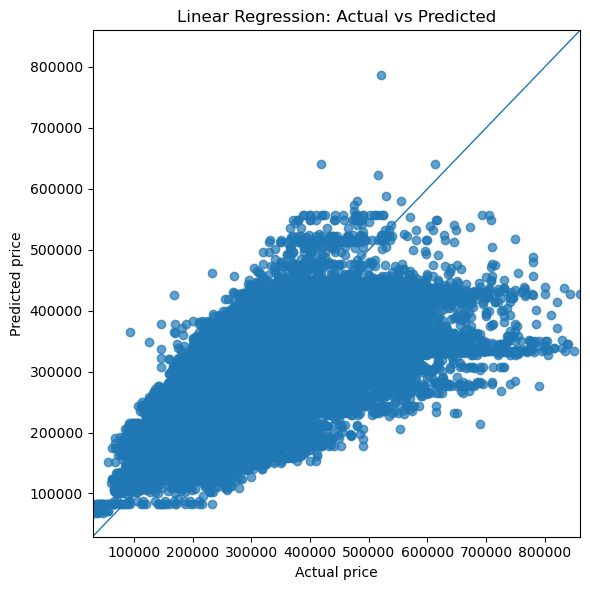

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)

lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims, linewidth=1)  
plt.xlim(lims)
plt.ylim(lims)

plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Linear Regression: Actual vs Predicted")

plt.tight_layout()
plt.show()

In [7]:
num_cols = ["area_sqm", "commence_date"]            # numeric predictors
cat_cols = ["location", "type", "block",
            "street", "storey_range", "flat_model"]  # categoricals

df = data.copy()
df = df.dropna(subset=num_cols + cat_cols + ["price"])

X = df[num_cols + cat_cols]
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test,  y_test_pred))

print("Train R² :", r2_score(y_train, y_train_pred))
print("Test R²  :", r2_score(y_test, y_test_pred))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Check coeffients for interpretation 
print("\nIntercept :", model.intercept_)
for name, coef in zip(features, model.coef_):
    print(f"{name:15s}: {coef:.4f}")

Train R² : 0.6848662588919556
Test R²  : 0.6789281748146119
Train RMSE: 62959.5259319675
Test RMSE: 63783.76965454172

Intercept : -7134877.844070606
area_sqm       : 1413.3385
commence_date  : 3658.3413


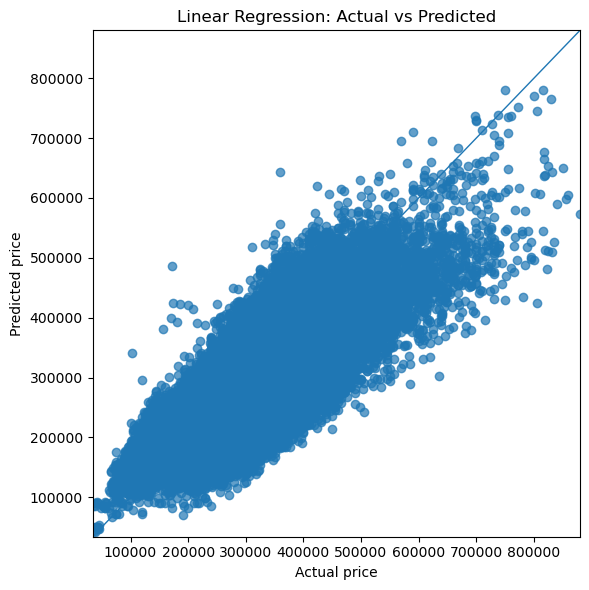

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)

lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims, linewidth=1)  
plt.xlim(lims)
plt.ylim(lims)

plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Linear Regression: Actual vs Predicted")

plt.tight_layout()
plt.show()

In [ ]:
# Although it seems like we have reached a good value, we'll try other model as well to reduce the bias.